# SDEs
In this notebook, we will try to model a simple SDE, an AR(1) or AR(2) SDE to create some ensembles to help with the autocorrelation structure in the SolarPower. 


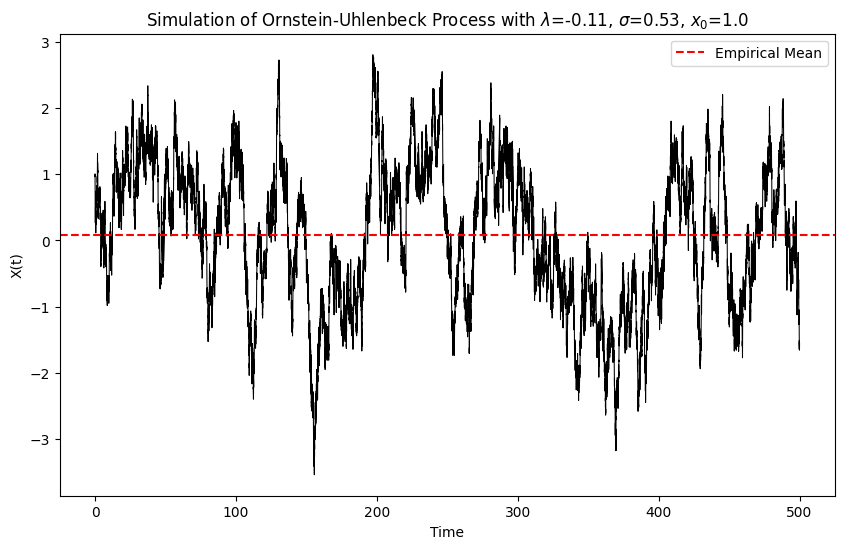

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the AR(1) process
tau = 1.0  # Discrete time step
k = 0.9    # AR(1) coefficient
w = 0.5    # Noise coefficient
T = 500     # Total time
dt = 0.01  # Time step for Euler-Maruyama

# Derived parameters for the SDE
a = np.log(k) / tau
b = w * np.sqrt(2 * np.log(k) / (tau * (k**2 - 1)))

# Initial condition
y0 = 1.0

# Time array
num_steps = int(T / dt)
t = np.linspace(0, T, num_steps)

# Array to store the solution
y = np.zeros(num_steps)
y[0] = y0

# Euler-Maruyama scheme
for i in range(1, num_steps):
    dw = np.sqrt(dt) * np.random.normal(0, 1)  # Wiener process increment
    y[i] = y[i-1] + a * y[i-1] * dt + b * dw

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(t, y, color = 'black', linewidth = 0.75)
plt.title(r"Simulation of Ornstein-Uhlenbeck Process with $\lambda$={:.2f}, $\sigma$={:.2f}, $x_0$={}".format(a, b, y0))
plt.axhline(np.mean(y), color = 'red', linestyle = '--', label = 'Empirical Mean')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.legend()
plt.savefig('ou_process_example.pdf')
plt.show()

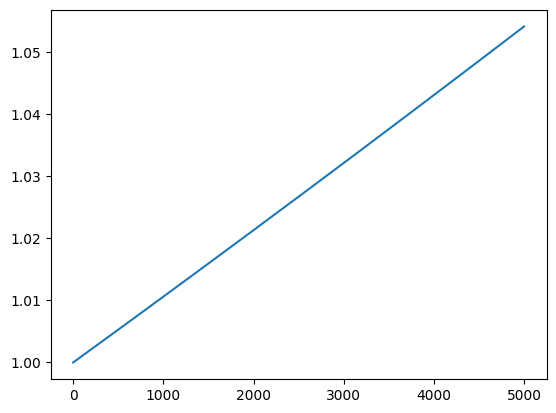

In [28]:
plt.plot(np.exp(-a * t*dt)*y0)

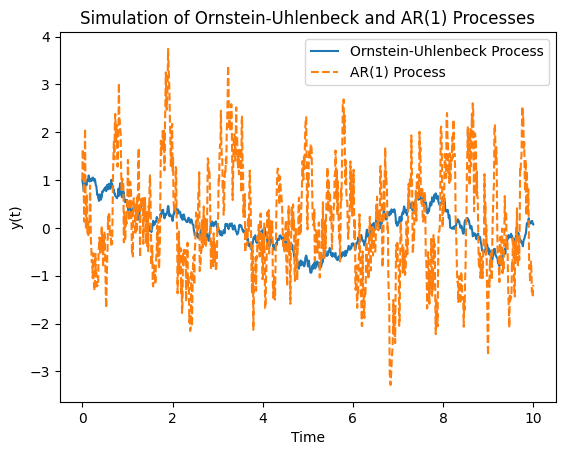

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the AR(1) process
tau = 1.0  # Discrete time step
k = 0.9    # AR(1) coefficient
w = 0.5    # Noise coefficient
T = 10     # Total time
dt = 0.01  # Time step for Euler-Maruyama

# Derived parameters for the SDE
a = np.log(k) / tau
b = w * np.sqrt(2 * np.log(k) / (tau * (k**2 - 1)))

# Initial condition
y0 = 1.0

# Time array
num_steps = int(T / dt)
t = np.linspace(0, T, num_steps)

# Array to store the solution for the SDE
y_sde = np.zeros(num_steps)
y_sde[0] = y0

# Array to store the solution for the AR(1) process
y_ar1 = np.zeros(num_steps)
y_ar1[0] = y0

# Euler-Maruyama scheme for the SDE
for i in range(1, num_steps):
    dw = np.sqrt(dt) * np.random.normal(0, 1)  # Wiener process increment
    y_sde[i] = y_sde[i-1] + a * y_sde[i-1] * dt + b * dw

# Simulate the AR(1) process
for i in range(1, num_steps):
    xi = np.random.normal(0, 1)  # IID normal random variable
    y_ar1[i] = k * y_ar1[i-1] + w * xi

# Plot both processes
plt.plot(t, y_sde, label='Ornstein-Uhlenbeck Process')
plt.plot(t, y_ar1, label='AR(1) Process', linestyle='dashed')
plt.title('Simulation of Ornstein-Uhlenbeck and AR(1) Processes')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

In [16]:
# load in the actual data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")



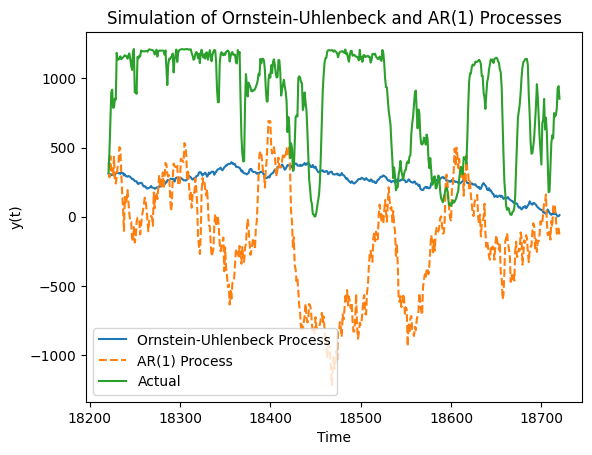

In [29]:
y = actuals["OffshoreWindPower"].values

# Estimate the parameters of the AR(1) process with statsmodels

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y, order=(1, 0, 0))
model_fit = model.fit()
#print(model_fit.summary())

# convert this to SDE Ornstein-Uhlenbeck form
# Derived parameters for the SDE
k = model_fit.params[1]
w = np.sqrt(model_fit.params[2])
tau = 1.0  # Discrete time step
a = np.log(k) / tau
b = w * np.sqrt(2 * np.log(k) / (tau * (k**2 - 1)))

# simulate the process
# Initial condition
y0 = y[0]

# Time array
T = len(y)
num_steps = T
t = np.linspace(0, T, num_steps)

# Array to store the solution for the SDE
y_sde = np.zeros(num_steps)
y_sde[0] = y0

# Array to store the solution for the AR(1) process
y_ar1 = np.zeros(num_steps)
y_ar1[0] = y0

# Euler-Maruyama scheme for the SDE
for i in range(1, num_steps):
    dw = np.sqrt(dt) * np.random.normal(0, 1)  # Wiener process increment
    y_sde[i] = y_sde[i-1] + a * y_sde[i-1] * dt + b * dw

# Simulate the AR(1) process
for i in range(1, num_steps):
    xi = np.random.normal(0, 1)  # IID normal random variable
    y_ar1[i] = k * y_ar1[i-1] + w * xi

# Plot both processes
tpts = 500
plt.plot(t[-tpts:], y_sde[-tpts:], label='Ornstein-Uhlenbeck Process')
plt.plot(t[-tpts:], y_ar1[-tpts:], label='AR(1) Process', linestyle='dashed')
plt.plot(t[-tpts:], y[-tpts:], label='Actual')
plt.title('Simulation of Ornstein-Uhlenbeck and AR(1) Processes')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

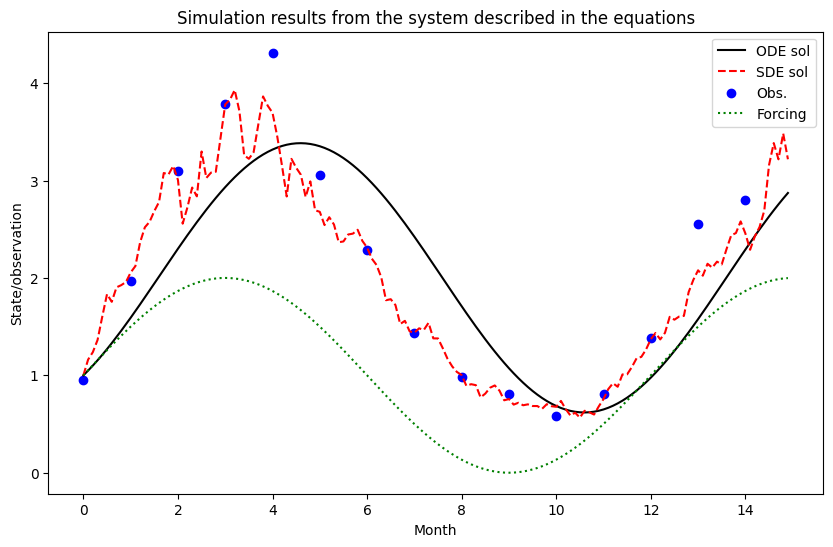

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
a = 0.5
sigma = 0.2
T = 15
dt = 0.1
time = np.arange(0, T, dt)

# Forcing function
forcing = np.sin(2 * np.pi / 12 * time) + 1

# SDE simulation using Euler-Maruyama method
np.random.seed(0)
x_sde = np.zeros_like(time)
x_sde[0] = 1.0  # initial condition
for i in range(1, len(time)):
    x_sde[i] = x_sde[i-1] + (forcing[i-1] - a * x_sde[i-1]) * dt + sigma * x_sde[i-1] * np.sqrt(dt) * np.random.normal()

# ODE solution using scipy's odeint
def ode_system(x, t, a):
    return forcing[int(t/dt)] - a * x

x_ode = odeint(ode_system, 1.0, time, args=(a,)).flatten()

# Generating observations
e_k = np.random.normal(0, 0.1, len(time))
y_k = x_sde * np.exp(e_k)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, x_ode, 'k-', label='ODE sol')
plt.plot(time, x_sde, 'r--', label='SDE sol')
plt.scatter(time[::10], y_k[::10], c='blue', label='Obs.')
plt.plot(time, forcing, 'g:', label='Forcing')
plt.xlabel('Month')
plt.ylabel('State/observation')
plt.legend()
plt.title('Simulation results from the system described in the equations')
plt.show()

std:  0.19040443635693902


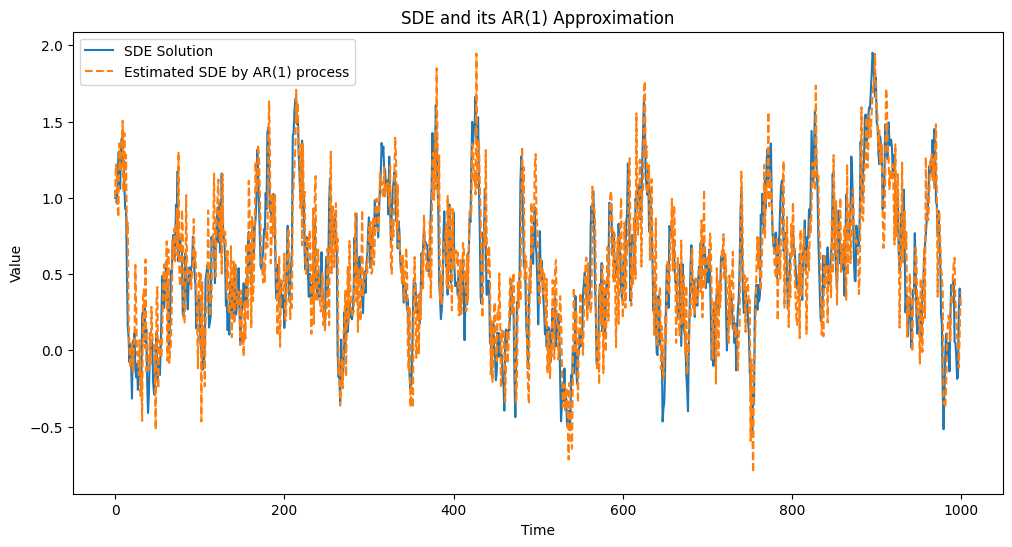

In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Generate some synthetic SDE data
np.random.seed(42)
n = 1000
mu = 0.5
theta = 0.1
sigma = 0.2
dt = 1

X_sde = np.zeros(n)
X_sde[0] = 1

for t in range(1, n):
    X_sde[t] = X_sde[t-1] + theta * (mu - X_sde[t-1]) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)

# Fit AR(1) model to the SDE data
# model = ARIMA(X_sde, order=(1,0,0))
# fit = model.fit()

# # Extract AR(1) parameters
# c_est = fit.params[0]
# a_est = fit.params[1]
# sigma_est = fit.bse[1]  # Use the standard error for the AR(1) coefficient

# print(f"c: {c_est}, a: {a_est}, sigma: {sigma_est}")

# Compute SDE parameters from AR(1) parameters
phi = np.exp(-theta * dt)
c = mu * (1 - phi)
print("std: ",  ((1/(2*theta)) * sigma**2*(1-np.exp(-2*theta*dt)))**0.5)
epsilon = np.random.normal(0, ((1/(2*theta)) * sigma**2*(1-np.exp(-2*theta*dt)))**0.5, n)


# Simulate SDE using the estimated parameters
X_cont = np.zeros(n)
X_cont[0] = 1

for t in range(1, n): # NOTICE, here we actualle do add the X_sde, so that the process, depens on itself, so we just don't get random stuff...
    X_cont[t] = c + phi * X_sde[t-1] + epsilon[t]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(X_sde, label='SDE Solution')
plt.plot(X_cont, label='Estimated SDE by AR(1) process', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SDE and its AR(1) Approximation')
plt.show()

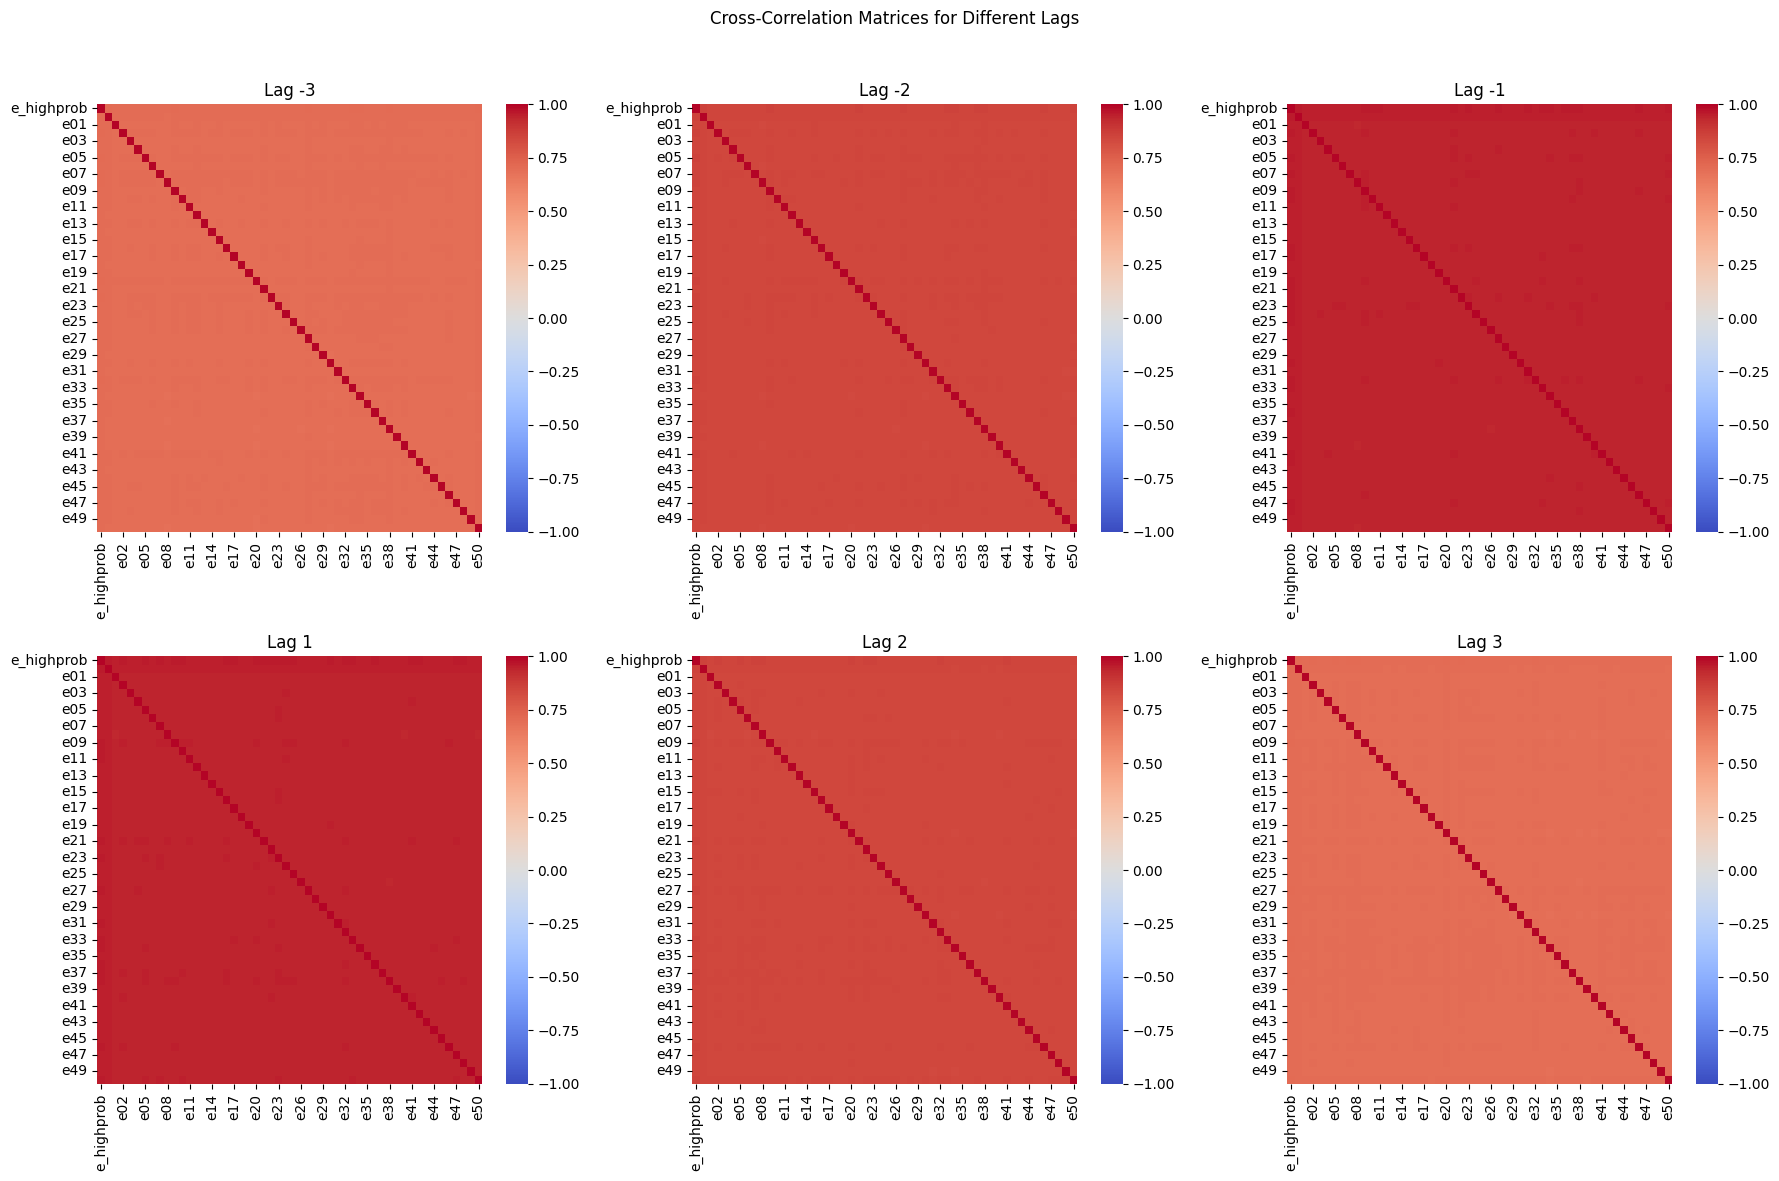

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def compute_cross_correlation_matrix(data, lag):
    """
    Compute the cross-correlation matrix for a DataFrame of time series for a specific lag.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing time series.
    lag (int): The specific lag to compute.
    
    Returns:
    pd.DataFrame: A DataFrame containing the cross-correlation matrix.
    """
    n_series = data.shape[1]
    cross_corr_matrix = pd.DataFrame(np.zeros((n_series, n_series)), columns=data.columns, index=data.columns)
    
    for i in range(n_series):
        for j in range(n_series):
            if i != j:
                cross_corr_matrix.iloc[i, j] = data.iloc[:, i].corr(data.iloc[:, j].shift(lag))
            else:
                cross_corr_matrix.iloc[i, j] = 1  # Autocorrelation is always 1
                
    return cross_corr_matrix

def plot_cross_correlation_matrices(data, lags):
    """
    Plot the cross-correlation matrices for specified lags as heatmaps.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing time series.
    lags (list of int): The list of lags to compute and plot.
    """
    n_lags = len(lags)
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 subplot layout
    
    for ax, lag in zip(axes.flat, lags):
        cross_corr_matrix = compute_cross_correlation_matrix(data, lag)
        sns.heatmap(cross_corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
        ax.set_title(f'Lag {lag}')
    
    plt.suptitle('Cross-Correlation Matrices for Different Lags')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    #plt.show()
    plt.savefig("cross_correlation_matrices_DK1_OffshoreWind.pdf")

# Example data
data = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
data = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
data = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed.pkl")

# Plot cross-correlation matrices for lags -3, -2, -1, 1, 2, and 3
lags = [-3, -2, -1, 1, 2, 3]
plot_cross_correlation_matrices(data, lags)